# <center>HW2</center>
### <center>106030012 廖昱瑋</center>
***

## <u>Question1</u>

### 資料處理
1. 將150筆dataset分為training和testing部分，以三種花平均分配的原則，取出training data 120筆、 testing data 30筆
2. 觀察dataset後，選擇對應不同labels時差異較大的sepal length及petal length作為features訓練
3. 將dataset順序打亂
4. 運用one-versus-rest，將創造三種不同dataset  
dataset 1: setosa v.s. not setosa  
dataset 2: versicolor v.s. not versicolor  
dataset 3: virginica v.s. not virginica  
若label符合為1, 不符合則為-1

In [88]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#replace labels by 1, 2, 3
df = df.replace({4: {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}})

#randomly get 120 training data which is evenly get from 3 labels
train=df.groupby(4, as_index=False, group_keys=False).apply(lambda x: x.sample(n=40))
test = df[~df.index.isin(train.index)]

print("training data:")
print(train)
print("testing data:")
print(test)

#choose sepal length and petal length as features
X_train = train.iloc[:,[0, 2]].values    
y_train = train.iloc[:, 4].values
X_test = test.iloc[:,[0, 2]].values
y_test = test.iloc[:, 4].values

#Suffle training and testing dataset
r = np.random.RandomState(1).permutation(len(y_train))
X_train, y_train = X_train[r], y_train[r]
r = np.random.RandomState(1).permutation(len(y_test))
X_test, y_test = X_test[r], y_test[r]

#create three dataset for OvR
y_train_1 = np.where(y_train == 1, 1, -1)
y_train_2 = np.where(y_train == 2, 1, -1)
y_train_3 = np.where(y_train == 3, 1, -1)
y_test_1 = np.where(y_test == 1, 1, -1)
y_test_2 = np.where(y_test == 2, 1, -1)
y_test_3 = np.where(y_test == 3, 1, -1)

training data:
       0    1    2    3  4
30   4.8  3.1  1.6  0.2  1
21   5.1  3.7  1.5  0.4  1
10   5.4  3.7  1.5  0.2  1
14   5.8  4.0  1.2  0.2  1
29   4.7  3.2  1.6  0.2  1
..   ...  ...  ...  ... ..
107  7.3  2.9  6.3  1.8  3
122  7.7  2.8  6.7  2.0  3
147  6.5  3.0  5.2  2.0  3
128  6.4  2.8  5.6  2.1  3
123  6.3  2.7  4.9  1.8  3

[120 rows x 5 columns]
testing data:
       0    1    2    3  4
3    4.6  3.1  1.5  0.2  1
4    5.0  3.6  1.4  0.2  1
15   5.7  4.4  1.5  0.4  1
26   5.0  3.4  1.6  0.4  1
36   5.5  3.5  1.3  0.2  1
38   4.4  3.0  1.3  0.2  1
39   5.1  3.4  1.5  0.2  1
40   5.0  3.5  1.3  0.3  1
43   5.0  3.5  1.6  0.6  1
49   5.0  3.3  1.4  0.2  1
52   6.9  3.1  4.9  1.5  2
53   5.5  2.3  4.0  1.3  2
60   5.0  2.0  3.5  1.0  2
67   5.8  2.7  4.1  1.0  2
78   6.0  2.9  4.5  1.5  2
80   5.5  2.4  3.8  1.1  2
82   5.8  2.7  3.9  1.2  2
91   6.1  3.0  4.6  1.4  2
93   5.0  2.3  3.3  1.0  2
99   5.7  2.8  4.1  1.3  2
100  6.3  3.3  6.0  2.5  3
102  7.1  3.0  5.9  2.1  3
10

### Function to Plot Decision Regions
先宣告plot_decision_regions function，模型訓練好後，用來畫data分布圖及分界線

In [89]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### (1) Perceptron
#### Perceptron API 

In [90]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def predict_before_unit_step(self, X):
        """Return class label"""
        return self.net_input(X)

#### Training Perceptron Models
透過OvR，分別用前面創造過的3種不同datasets，個別訓練出Perceptron Model  
用trial and error，盡量讓decision region分界線分界清楚，並且讓predictions分別趨近1及-1，不斷的調整，選取適當的hyperparameter及number of iterations  
* Model_1: 在第一個iteration後accuracy就100%了，所以n_iter設1，再調整eta使得prediction接近labels
* Model_2: predictions容易偏向負數，將eta調小可以讓它漸漸轉正，但eta小iterations次數就要多
* Model_3: eta為0.1時，predictions很發散，所以將eta調小並把iterations次數加大  
  
經過trial and error，最後eta及n_iter數字選用為
* Model_1: eta = 0.03, n_iter = 1
* Model_2: eta = 0.00005, n_iter = 154
* Model_3: eta = 0.0005, n_iter = 500

#### Perception Result
##### (1)Test Data Prediction

In [91]:
ppn_1 = Perceptron(eta=0.03, n_iter=1)
ppn_1.fit(X_train, y_train_1)
ppn_2 = Perceptron(eta=0.00005, n_iter=154)
ppn_2.fit(X_train, y_train_2)
ppn_3 = Perceptron(eta=0.0005, n_iter=500)
ppn_3.fit(X_train, y_train_3)

p1 = ppn_1.predict_before_unit_step(X_test)
print("Model_1 prediction: ")
print(p1)

p2 = ppn_2.predict_before_unit_step(X_test)
print("\nModel_2 prediction: ")
print(p2)

p3 = ppn_3.predict_before_unit_step(X_test)
print("\nModel_3 prediction: ")
print(p3)

result = np.argmax((p1, p2, p3), 0) + 1
print("\nChoose the maximum prediction: ")
print(result)

print("\nOriginal testing data labels:")
print(y_test)

print("\nAccuracy:", np.sum(result == y_test) / 30 * 100 , "%")


Model_1 prediction: 
[-0.63396959 -0.93015339 -0.62724815 -0.5220817  -0.61422966 -1.06858751
 -1.1144493   0.20880488 -0.82490206 -0.97635467 -0.94997819  0.37353062
  0.33405076 -0.83800543  0.2549213  -0.35097403 -0.50889346  0.3075894
 -1.18030564  0.27466123 -0.44303712  0.18898008 -0.44967368 -0.71301418
 -0.93687482  0.27466123  0.20880488 -0.41683038 -0.51553002  0.22845994]

Model_2 prediction: 
[-0.00373159 -0.00463639 -0.00560115 -0.0033387  -0.00359466 -0.00214751
 -0.0051483  -0.00516712 -0.00352306 -0.00304067 -0.00362419 -0.00709038
 -0.00736424 -0.00438043 -0.0056137  -0.00253503 -0.00363046 -0.0056316
 -0.00483864 -0.00547677 -0.00394012 -0.00415492 -0.00321968 -0.00313018
 -0.00276682 -0.00547677 -0.00516712 -0.00222538 -0.00291002 -0.00388106]

Model_3 prediction: 
[-0.05075959  0.07757661 -0.06805815 -0.0988517  -0.05872966  0.15972249
  0.1578207  -0.44645512  0.03799794  0.11081533  0.09433181 -0.53629938
 -0.52035924  0.03745457 -0.4709087  -0.17085403 -0.1070934

##### (2) Decision Region

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


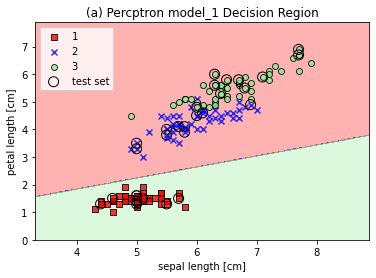

Data that is not predicted correctly in model_1 : 0
Accuracy for model_1 : 100.00 %



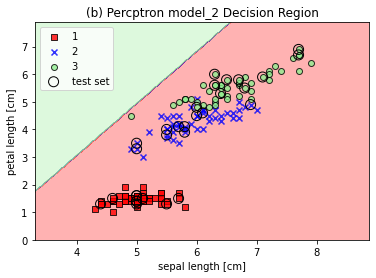

Data that is not predicted correctly in model_2 : 50
Accuracy for model_2 : 66.67 %



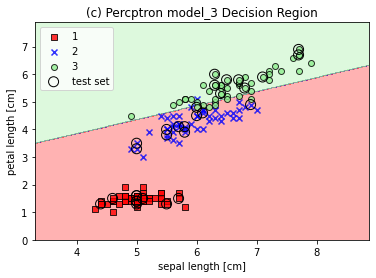

Data that is not predicted correctly in model_3 : 9
Accuracy for model_3 : 94.00 %



In [92]:
plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=ppn_1, test_idx=range(120,150))
plt.title('(a) Percptron model_1 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_1 = ppn_1.predict(np.vstack((X_train, X_test)))
error_1 = np.sum(yp_1 != (np.hstack((y_train_1, y_test_1))))
print("Data that is not predicted correctly in model_1 :", error_1)
print("Accuracy for model_1 : %.2f %%\n" % float((150-error_1)/150*100))

plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=ppn_2, test_idx=range(120,150))
plt.title('(b) Percptron model_2 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_2 = ppn_2.predict(np.vstack((X_train, X_test)))
error_2 = np.sum(yp_2 != (np.hstack((y_train_2, y_test_2))))
print("Data that is not predicted correctly in model_2 :", error_2)
print("Accuracy for model_2 : %.2f %%\n" % float((150-error_2)/150*100))

plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=ppn_3, test_idx=range(120,150))
plt.title('(c) Percptron model_3 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_3 = ppn_3.predict(np.vstack((X_train, X_test)))
error_3 = np.sum(yp_3 != (np.hstack((y_train_3, y_test_3))))
print("Data that is not predicted correctly in model_3 :", error_3)
print("Accuracy for model_3 : %.2f %%\n" % float((150-error_3)/150*100))

### (2) Adaline
#### Adaline API

In [93]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def predict_before_unit_step(self, X):
        """Return class label before unit step"""
        return self.activation(self.net_input(X))

#### Training Adaline Models
透過OvR，分別用前面創造過的3種不同datasets，個別訓練出Adaline Model  
用trial and error，盡量讓decision region分界線分界清楚，並且讓predictions分別趨近1及-1，不斷的調整，選取適當的hyperparameter及number of iterations  
* Model_1: eta為0.1時，predictions很發散，所以將eta調小並把iterations次數加大
* Model_2: predictions容易偏向負數，將eta調小可以讓它漸漸轉正，先訂下合理的eta值，再試n_iter使得predictions接近labels
* Model_3: eta為0.1時，predictions很發散，所以將eta調小並把iterations次數加大  
  
經過trial and error，最後eta及n_iter數字選用為
* Model_1: eta = 0.0002, n_iter = 100
* Model_2: eta = 0.00032, n_iter = 10
* Model_3: eta = 0.0003, n_iter = 60

#### Adaline Result
##### (1) Test Data Prediction

In [94]:
adal_1 = AdalineGD(eta=0.0002, n_iter=100)
adal_1.fit(X_train, y_train_1)
adal_2 = AdalineGD(eta=0.00032, n_iter=10)
adal_2.fit(X_train, y_train_2)
adal_3 = AdalineGD(eta=0.0003, n_iter=60)
adal_3.fit(X_train, y_train_3)

p1 = adal_1.predict_before_unit_step(X_test)
print("Model_1 prediction: ")
print(p1)

p2 = adal_2.predict_before_unit_step(X_test)
print("\nModel_2 prediction: ")
print(p2)

p3 = adal_3.predict_before_unit_step(X_test)
print("\nModel_3 prediction: ")
print(p3)

result = np.argmax((p1, p2, p3), 0) + 1
print("\nChoose the maximum prediction: ")
print(result)

print("\nOriginal testing data labels:")
print(y_test)

print("\nAccuracy:", np.sum(result == y_test) / 30 * 100 , "%")

Model_1 prediction: 
[-0.7791694  -1.26220068 -0.71360764 -0.59817274 -0.74919006 -1.57207961
 -1.56423531  0.71110994 -1.1134246  -1.38772112 -1.32552121  1.0498476
  0.98988892 -1.11118337  0.80328919 -0.32723807 -0.56707279  0.89434783
 -1.6863939   0.83326853 -0.4449142   0.64778942 -0.47713477 -0.93242794
 -1.32776244  0.83326853  0.71110994 -0.44939666 -0.59929336  0.7077481 ]

Model_2 prediction: 
[-0.04440351 -0.00872183 -0.0737625  -0.0571112  -0.04562421  0.05193681
  0.01425217 -0.20650446 -0.00944178  0.02307856  0.00987013 -0.26300027
 -0.26055888 -0.02020882 -0.22093359 -0.07348098 -0.06371542 -0.22997919
  0.02990199 -0.22215428 -0.07936524 -0.18791251 -0.0673775  -0.02214947
  0.02063717 -0.22215428 -0.20650446 -0.05783116 -0.05172768 -0.1903539 ]

Model_3 prediction: 
[ 0.00854563  0.29196931 -0.11908897 -0.09524618 -0.00543024  0.61115718
  0.47160118 -1.055067    0.24202652  0.44755566  0.37973077 -1.36829417
 -1.34034243  0.20215338 -1.13686776 -0.2409656  -0.129158

##### (2) Decision Region

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


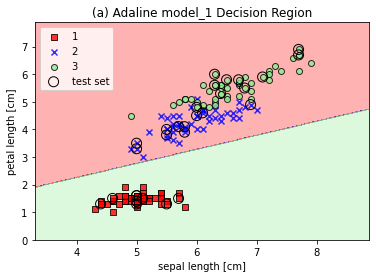

Data that is not predicted correctly in model_1 : 0
Accuracy for model_1 : 100.00 %



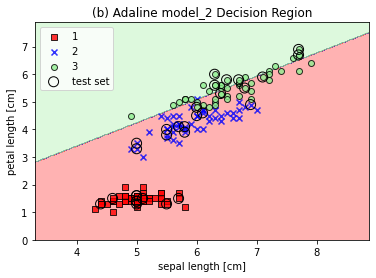

Data that is not predicted correctly in model_2 : 75
Accuracy for model_2 : 50.00 %



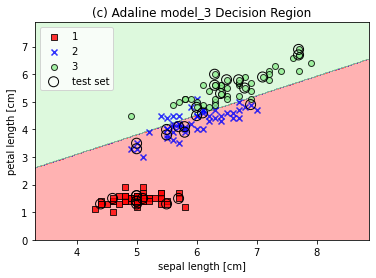

Data that is not predicted correctly in model_3 : 11
Accuracy for model_3 : 92.67 %



In [95]:
plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=adal_1, test_idx=range(120,150))
plt.title('(a) Adaline model_1 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_1 = adal_1.predict(np.vstack((X_train, X_test)))
error_1 = np.sum(yp_1 != (np.hstack((y_train_1, y_test_1))))
print("Data that is not predicted correctly in model_1 :", error_1)
print("Accuracy for model_1 : %.2f %%\n" % float((150-error_1)/150*100))

plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=adal_2, test_idx=range(120,150))
plt.title('(b) Adaline model_2 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_2 = adal_2.predict(np.vstack((X_train, X_test)))
error_2 = np.sum(yp_2 != (np.hstack((y_train_2, y_test_2))))
print("Data that is not predicted correctly in model_2 :", error_2)
print("Accuracy for model_2 : %.2f %%\n" % float((150-error_2)/150*100))

plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=adal_3, test_idx=range(120,150))
plt.title('(c) Adaline model_3 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_3 = adal_3.predict(np.vstack((X_train, X_test)))
error_3 = np.sum(yp_3 != (np.hstack((y_train_3, y_test_3))))
print("Data that is not predicted correctly in model_3 :", error_3)
print("Accuracy for model_3 : %.2f %%\n" % float((150-error_3)/150*100))

### (3) Adaline SGD
#### Adaline SGD API

In [96]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def predict_before_unit_step(self, X):
        """Return class label before unit step"""
        return self.activation(self.net_input(X))

#### Training Adaline SGD Models
透過OvR，分別用前面創造過的3種不同datasets，個別訓練出Adaline SGD Model  
將training dataset中前20筆資料丟進Adaline SGD model一次training，再將讓後面的資料一筆一筆經過activation function調整weight  
用trial and error，盡量讓decision region分界線分界清楚，並且讓predictions分別趨近1及-1，不斷的調整，選取適當的hyperparameter及number of iterations  
由於Adaline SGD有做shuffle的動作，且一筆一筆調整weight，所以prediction變動較大，eta跟iteration比較難調整到想要的值  
* Model_1: eta為0.1時，predictions值較大，所以將eta調小並把iterations次數加大
* Model_2: 先訂下合理的eta值，再試n_iter使得predictions接近labels，但由於此model是linear iseparable，所以一直都無法達到理想的狀態
* Model_3: eta為0.1時，predictions很發散，所以將eta調小並把iterations次數加大  
  
經過trial and error，最後eta及n_iter數字選用為
* Model_1: eta = 0.01, n_iter = 100
* Model_2: eta = 0.033, n_iter = 864
* Model_3: eta = 0.00025, n_iter = 60

#### Adaline SGD Result
##### (1) Test Data Prediction

In [97]:
adals_1 = AdalineSGD(eta=0.01, n_iter=100)
adals_1.fit(X_train[:20, :], y_train_1[:20])
adals_1.partial_fit(X_train[20:, :], y_train_1[20:])
adals_2 = AdalineSGD(eta=0.033, n_iter=864)
adals_2.fit(X_train[:20, :], y_train_2[:20])
adals_2.partial_fit(X_train[20:, :], y_train_2[20:])
adals_3 = AdalineSGD(eta=0.0025, n_iter=60)
adals_3.fit(X_train[:20, :], y_train_3[:20])
adals_3.partial_fit(X_train[20:, :], y_train_3[20:])

p1 = adals_1.predict_before_unit_step(X_test)
print("Model_1 prediction: ")
print(p1)

p2 = adals_2.predict_before_unit_step(X_test)
print("\nModel_2 prediction: ")
print(p2)

p3 = adals_3.predict_before_unit_step(X_test)
print("\nModel_3 prediction: ")
print(p3)

result = np.argmax((p1, p2, p3), 0) + 1
print("\nChoose the maximum prediction: ")
print(result)

print("\nOriginal testing data labels:")
print(y_test)

print("\nAccuracy:", np.sum(result == y_test) / 30 * 100 , "%")

Model_1 prediction: 
[-0.5603895  -0.97982914 -0.43090041 -0.40518231 -0.53729854 -1.36069162
 -1.24406159  0.88763472 -0.88103578 -1.15550014 -1.07599535  1.27492673
  1.22874481 -0.84771291  0.99023046 -0.18070225 -0.36542992  1.07616477
 -1.36974829  1.01332142 -0.23974322  0.7914685  -0.29615704 -0.72582859
 -1.10931822  1.01332142  0.88763472 -0.30638895 -0.42184374  0.83765042]

Model_2 prediction: 
[-0.28726854 -0.68147464 -0.94640179 -0.12029506 -0.23391137  0.16347935
 -0.90870726 -0.58298822 -0.26151929 -0.12905572 -0.32868042 -1.22141553
 -1.32812986 -0.56785833 -0.72925576  0.20674992 -0.22010741 -0.72235377
 -0.8157969  -0.67589859 -0.31301778 -0.230194   -0.06003591 -0.09454582
 -0.02234139 -0.67589859 -0.58298822  0.29966029  0.03287446 -0.12347967]

Model_3 prediction: 
[-0.11768405  0.18979308 -0.26468154 -0.23005384 -0.13250017  0.54921175
  0.38490041 -1.28966203  0.1391855   0.36642281  0.28984447 -1.64042378
 -1.61079153  0.09223941 -1.3810565  -0.38687201 -0.26834

##### (2) Decision Region

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


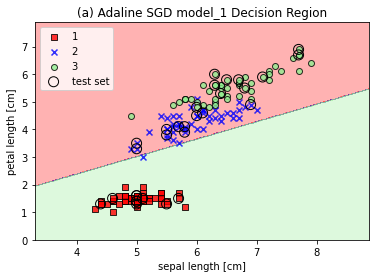

Data that is not predicted correctly in model_1 : 1
Accuracy for model_1 : 99.33 %



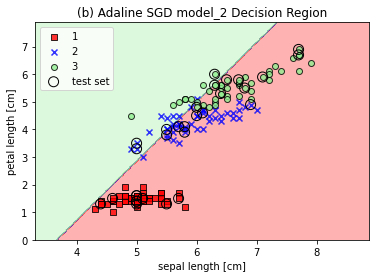

Data that is not predicted correctly in model_2 : 46 

Accuracy for model_2 : 69.33 %



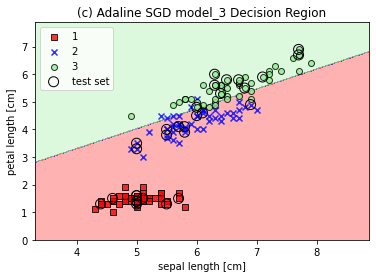

Data that is not predicted correctly in model_3 : 10 

Accuracy for model_3 : 93.33 %



In [98]:
plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=adals_1, test_idx=range(120,150))
plt.title('(a) Adaline SGD model_1 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_1 = adals_1.predict(np.vstack((X_train, X_test)))
error_1 = np.sum(yp_1 != (np.hstack((y_train_1, y_test_1))))
print("Data that is not predicted correctly in model_1 :", error_1)
print("Accuracy for model_1 : %.2f %%\n" % float((150-error_1)/150*100))
                 
plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=adals_2, test_idx=range(120,150))
plt.title('(b) Adaline SGD model_2 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_2 = adals_2.predict(np.vstack((X_train, X_test)))
error_2 = np.sum(yp_2 != (np.hstack((y_train_2, y_test_2))))
print("Data that is not predicted correctly in model_2 :", error_2, "\n")
print("Accuracy for model_2 : %.2f %%\n" % float((150-error_2)/150*100))

plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), 
                      classifier=adals_3, test_idx=range(120,150))
plt.title('(c) Adaline SGD model_3 Decision Region')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

yp_3 = adals_3.predict(np.vstack((X_train, X_test)))
error_3 = np.sum(yp_3 != (np.hstack((y_train_3, y_test_3))))
print("Data that is not predicted correctly in model_3 :", error_3, "\n")
print("Accuracy for model_3 : %.2f %%\n" % float((150-error_3)/150*100))

### Question1 Conclusion
* 這次作業學到了如何平均分割dataset並將dataset打亂，以及用Perceptron、Adaline、Adaline SGD訓練model  
* 在training中，我只有選擇2個features：sepal length及petal length，畫散布圖時才發現versicolor及virginica分布的不夠分散，導致training結果沒有很理想，這說明了要靠眼睛觀察找出散步比較開的features是不準的
* 我沒有先standardize data，所以調整eta及n_iter參數時，覺得比較難調
* 運用OvR 3種models中，由散布圖可以得知y2 v.s. y1y3是linear inseparable，所以這個model參數很難調，也無法訓練到accuracy很高，目前accuracy大約50多~60多%；而y1 v.s. y2y3分布的叫散開且為linear separable，所以是比較好訓練的部分，accuracy可以到將近100%

***
## <u>Question2</u>

### Description
* 透過OvR分別用Perceptron、Adaline、Adaline SGD三種algorithm train models
* 將全部13種features丟進去train
* 所有features先標準化後再進行training
* 畫Decision Region時，只採用Alcohol及OD280/OD315 of diluted wines這兩個features畫二維圖

### 資料處理
1. 將178筆dataset分為training和testing部分，以三種酒平均分配的原則，取出training data 120筆、 testing data 58筆
2. 將features標準化
3. 將dataset順序打亂
4. 運用one-versus-rest，將創造三種不同dataset  
dataset 1: y1 v.s. y2y3  
dataset 2: y2 v.s. y1y3  
dataset 3: y3 v.s. y1y2  
若label符合為1, 不符合則為-1

In [99]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

#randomly get 120 training data which is evenly get from 3 labels
s0 = df[df[0] == 1].sample(40)
s1 = df[df[0] == 2].sample(48)
s2 = df[df[0] == 3].sample(32)
train = pd.concat([s0,s1,s2])
test = df[~df.index.isin(train.index)]

print("training data:")
print(train)
print("testing data:")
print(test)

#standardization
train_std = np.copy(train)
test_std = np.copy(test)
for i in range(1,14):
    train_std[:, i] = (train.iloc[:, i] - train.iloc[:, i].mean()) / train.iloc[:, i].std()
    test_std[:, i] = (test.iloc[:, i] - test.iloc[:, i].mean()) / test.iloc[:, i].std()

#separate features and labels
X_train_std = train_std[:,:]    
y_train = train_std[:, 0]
X_test_std = test_std[:,:]
y_test = test_std[:, 0]

#Suffle training and testing dataset
r = np.random.RandomState(1).permutation(len(y_train))
X_train_std, y_train = X_train_std[r], y_train[r]
r = np.random.RandomState(1).permutation(len(y_test))
X_test_std, y_test = X_test_std[r], y_test[r]

#create three dataset for OvR
y_train_1 = np.where(y_train == 1, 1, -1)
y_train_2 = np.where(y_train == 2, 1, -1)
y_train_3 = np.where(y_train == 3, 1, -1)
y_test_1 = np.where(y_test == 1, 1, -1)
y_test_2 = np.where(y_test == 2, 1, -1)
y_test_3 = np.where(y_test == 3, 1, -1)

training data:
     0      1     2     3     4    5     6     7     8     9     10    11  \
58    1  13.72  1.43  2.50  16.7  108  3.40  3.67  0.19  2.04  6.80  0.89   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05   
5     1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05   
33    1  13.76  1.53  2.70  19.5  132  2.95  2.74  0.50  1.35  5.40  1.25   
35    1  13.48  1.81  2.41  20.5  100  2.70  2.98  0.26  1.86  5.10  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46  9.30  0.60   
146   3  13.88  5.04  2.23  20.0   80  0.98  0.34  0.40  0.68  4.90  0.58   
169   3  13.40  4.60  2.86  25.0  112  1.98  0.96  0.27  1.11  8.50  0.67   
139   3  12.84  2.96  2.61  24.0  101  2.32  0.60  0.53  0.81  4.92  0.89   
147   3  12.87  4.61  2.48  21.5   86  1.70  0.65  0.47  0.86  7.65  0.54   

       12    13  
58   2.87  1285  
1    3.40  1050  
5    2

### Function to Plot Decision Regions
先宣告plot_decision_regions function，模型訓練好後，用來畫data分布圖及分界線  
因為只從13種features中選取2種features畫圖，將裡面使用到的function <b>predict</b> 改為 <b>predict_plot</b>  
<b>predict_plot</b>定義在各algorithm API裡，將13種features與weight內積改為2種

In [100]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict_plot(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### (1) Perceptron
#### Perceptron API 
新增<b>predict_plot</b> 及 <b>net_input_plot</b> function 用以將13種features與weight內積改為2種

In [101]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def predict_before_unit_step(self, X):
        """Return class label"""
        return self.net_input(X)
    
    def predict_plot(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input_plot(X) >= 0.0, 1, -1)
    
    def net_input_plot(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[[1,12]]) + self.w_[0]

#### Training Perceptron Models
透過OvR，分別用前面創造過的3種不同datasets，個別訓練出Perceptron Model  
用trial and error，讓predictions分別趨近1及-1，不斷的調整，選取適當的hyperparameter及number of iterations   
因為model選用了13種features去train，而畫圖只有選用其中2種features畫，被降低了維度，所以無法以分界線是否分清楚判斷如何調整eta及n_iter  
  
經過trial and error，最後eta及n_iter數字選用為
* Model_1: eta = 0.02, n_iter = 100
* Model_2: eta = 0.015, n_iter = 100
* Model_3: eta = 0.04, n_iter = 110

#### Perception Result
##### (1)Test Data Prediction

In [102]:
ppn_1 = Perceptron(eta=0.02, n_iter=100)
ppn_1.fit(X_train_std, y_train_1)
ppn_2 = Perceptron(eta=0.015, n_iter=100)
ppn_2.fit(X_train_std, y_train_2)
ppn_3 = Perceptron(eta=0.04, n_iter=110)
ppn_3.fit(X_train_std, y_train_3)

p1 = ppn_1.predict_before_unit_step(X_test_std)
print("Model_1 prediction: ")
print(p1)

p2 = ppn_2.predict_before_unit_step(X_test_std)
print("\nModel_2 prediction: ")
print(p2)

p3 = ppn_3.predict_before_unit_step(X_test_std)
print("\nModel_3 prediction: ")
print(p3)

result = np.argmax((p1, p2, p3), 0) + 1
print("\nChoose the maximum prediction: ")
print(result)

print("\nOriginal testing data labels:")
print(y_test)

print("\nAccuracy:", np.sum(result == y_test) / 58 * 100 , "%")


Model_1 prediction: 
[-1.09846296  0.52101034 -0.75200558 -0.48349194 -0.57889531 -0.73862915
 -0.41691975 -0.4811026  -0.79058878 -0.74457746 -1.33086784  0.28415404
 -0.87142305 -0.97693394 -0.27545217  0.22794612 -0.7215074  -1.15591526
 -0.88138833 -0.83488472 -0.76478074 -0.8477424  -0.74935543 -0.84659856
 -0.64608995 -0.2864149   0.19967189 -0.63801478 -0.92890114 -0.60440539
  0.28270245 -0.79139556 -0.37779866 -0.62466223  0.61360146  0.91428689
 -0.94153719 -0.87307607 -0.84279606 -0.83218543  0.61886671 -0.59496115
 -0.32397377 -1.03026332  0.29196044  0.55217115 -0.53733651  0.63192118
  0.60699664  0.79895782  0.63134988 -0.1101786   0.21420117  0.54171492
  0.16784147  0.82510111 -0.9820402  -0.64606584]

Model_2 prediction: 
[-0.31369022 -0.48470276  0.62020777 -0.57345892  0.35000309  0.65137908
  0.25244448  0.56903752  0.6887608  -1.27717668 -0.0439811  -0.45042391
  1.00149614  0.93373879  0.46175725  0.02481477 -0.83872759  0.95467089
 -0.65690201  0.62808465  0.296

##### (2) Decision Region

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


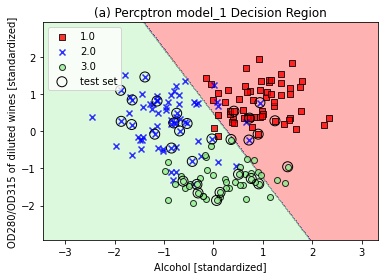

Data that is not predicted correctly in model_1 : 1
Accuracy for model_1 : 99.33 %



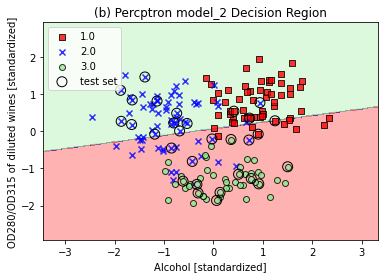

Data that is not predicted correctly in model_2 : 2
Accuracy for model_2 : 98.67 %



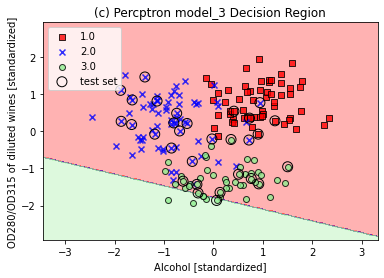

Data that is not predicted correctly in model_3 : 0
Accuracy for model_3 : 100.00 %



In [103]:
a = X_train_std[:,[1,12]]
b = X_test_std[:,[1,12]]

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=ppn_1, test_idx=range(120,150))
plt.title('(a) Percptron model_1 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_1 = ppn_1.predict(np.vstack((X_train_std, X_test_std)))
error_1 = np.sum(yp_1 != (np.hstack((y_train_1, y_test_1))))
print("Data that is not predicted correctly in model_1 :", error_1)
print("Accuracy for model_1 : %.2f %%\n" % float((150-error_1)/150*100))

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=ppn_2, test_idx=range(120,150))
plt.title('(b) Percptron model_2 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_2 = ppn_2.predict(np.vstack((X_train_std, X_test_std)))
error_2 = np.sum(yp_2 != (np.hstack((y_train_2, y_test_2))))
print("Data that is not predicted correctly in model_2 :", error_2)
print("Accuracy for model_2 : %.2f %%\n" % float((150-error_2)/150*100))

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=ppn_3, test_idx=range(120,150))
plt.title('(c) Percptron model_3 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_3 = ppn_3.predict(np.vstack((X_train_std, X_test_std)))
error_3 = np.sum(yp_3 != (np.hstack((y_train_3, y_test_3))))
print("Data that is not predicted correctly in model_3 :", error_3)
print("Accuracy for model_3 : %.2f %%\n" % float((150-error_3)/150*100))

### (2) Adaline
#### Adaline API
新增<b>predict_plot</b> 及 <b>net_input_plot</b> function 用以將13種features與weight內積改為2種

In [104]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def predict_before_unit_step(self, X):
        """Return class label before unit step"""
        return self.activation(self.net_input(X))
    
    def predict_plot(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input_plot(X) >= 0.0, 1, -1)
    
    def net_input_plot(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[[1,12]]) + self.w_[0]

#### Training Adaline Models
透過OvR，分別用前面創造過的3種不同datasets，個別訓練出Adaline Model  
用trial and error，讓predictions分別趨近1及-1，不斷的調整，選取適當的hyperparameter及number of iterations   
因為model選用了13種features去train，而畫圖只有選用其中2種features畫，被降低了維度，所以無法以分界線是否分清楚判斷如何調整eta及n_iter   
  
經過trial and error，最後eta及n_iter數字選用為
* Model_1: eta = 0.0004, n_iter = 100
* Model_2: eta = 0.00022, n_iter = 10
* Model_3: eta = 0.0003, n_iter = 50

#### Adaline Result
##### (1) Test Data Prediction

In [105]:
adal_1 = AdalineGD(eta=0.0004, n_iter=100)
adal_1.fit(X_train_std, y_train_1)
adal_2 = AdalineGD(eta=0.0022, n_iter=10)
adal_2.fit(X_train_std, y_train_2)
adal_3 = AdalineGD(eta=0.0003, n_iter=50)
adal_3.fit(X_train_std, y_train_3)

p1 = adal_1.predict_before_unit_step(X_test_std)
print("Model_1 prediction: ")
print(p1)

p2 = adal_2.predict_before_unit_step(X_test_std)
print("\nModel_2 prediction: ")
print(p2)

p3 = adal_3.predict_before_unit_step(X_test_std)
print("\nModel_3 prediction: ")
print(p3)

result = np.argmax((p1, p2, p3), 0) + 1
print("\nChoose the maximum prediction: ")
print(result)

print("\nOriginal testing data labels:")
print(y_test)

print("\nAccuracy:", np.sum(result == y_test) / 58 * 100 , "%")

Model_1 prediction: 
[-1.43928802  0.93133297 -0.96950119 -0.62558826 -0.70135199 -1.10772854
 -0.60960072 -0.53946131 -0.5827355  -0.82579123 -1.46844017  0.64572361
 -1.16731958 -1.26762848 -0.58128903  0.51365011 -0.89770066 -1.19459355
 -1.28465051 -1.06697381 -0.89443092 -1.24368346 -0.89453534 -1.03039746
 -0.65434565 -0.42836828  0.4262199  -0.88923862 -1.0803     -0.8666314
  0.52605328 -0.98770382 -0.44441611 -0.9290452   0.88196579  1.29014702
 -1.18186666 -1.00393371 -1.02825086 -1.11041742  0.84272853 -0.79330185
 -0.44500733 -1.06101041  0.71787395  0.82356019 -0.65219596  1.21376068
  0.77954458  1.2391738   1.07498683  0.1787283   0.36600768  0.9841284
  0.64692282  1.11097999 -1.23122191 -0.86481375]

Model_2 prediction: 
[-0.33473408 -0.94000151  0.92807868 -0.85347965  0.76719838  1.00980184
  0.66668442  0.17528775  0.61065309 -1.34921122 -0.22295637 -0.71732543
  1.10588988  1.18236611  0.37778404 -0.28100095 -1.16684241  1.19976564
 -0.75474838  0.58739757  0.38350

##### (2) Decision Region

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


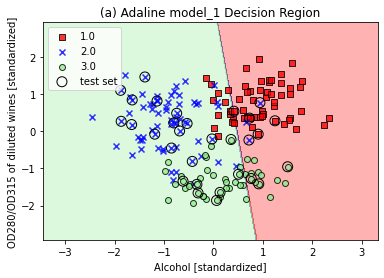

Data that is not predicted correctly in model_1 : 0
Accuracy for model_1 : 100.00 %



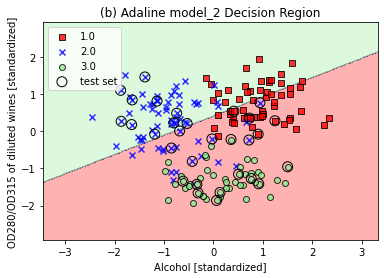

Data that is not predicted correctly in model_2 : 2
Accuracy for model_2 : 98.67 %



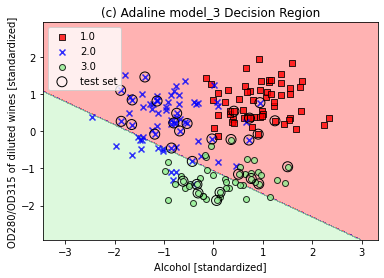

Data that is not predicted correctly in model_3 : 3
Accuracy for model_3 : 98.00 %



In [106]:
a = X_train_std[:,[1,12]]
b = X_test_std[:,[1,12]]

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=adal_1, test_idx=range(120,150))
plt.title('(a) Adaline model_1 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_1 = adal_1.predict(np.vstack((X_train_std, X_test_std)))
error_1 = np.sum(yp_1 != (np.hstack((y_train_1, y_test_1))))
print("Data that is not predicted correctly in model_1 :", error_1)
print("Accuracy for model_1 : %.2f %%\n" % float((150-error_1)/150*100))

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=adal_2, test_idx=range(120,150))
plt.title('(b) Adaline model_2 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_2 = adal_2.predict(np.vstack((X_train_std, X_test_std)))
error_2 = np.sum(yp_2 != (np.hstack((y_train_2, y_test_2))))
print("Data that is not predicted correctly in model_2 :", error_2)
print("Accuracy for model_2 : %.2f %%\n" % float((150-error_2)/150*100))

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=adal_3, test_idx=range(120,150))
plt.title('(c) Adaline model_3 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_3 = adal_3.predict(np.vstack((X_train_std, X_test_std)))
error_3 = np.sum(yp_3 != (np.hstack((y_train_3, y_test_3))))
print("Data that is not predicted correctly in model_3 :", error_3)
print("Accuracy for model_3 : %.2f %%\n" % float((150-error_3)/150*100))

### (3) Adaline SGD
#### Adaline SGD API
新增<b>predict_plot</b> 及 <b>net_input_plot</b> function 用以將13種features與weight內積改為2種

In [107]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def predict_before_unit_step(self, X):
        """Return class label before unit step"""
        return self.activation(self.net_input(X))
    
    def predict_plot(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input_plot(X) >= 0.0, 1, -1)
    
    def net_input_plot(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[[1,12]]) + self.w_[0]

#### Training Adaline SGD Models
透過OvR，分別用前面創造過的3種不同datasets，個別訓練出Adaline SGD Model  
將training dataset中前20筆資料丟進Adaline SGD model一次training，再將讓後面的資料一筆一筆經過activation function調整weight  
用trial and error，讓predictions分別趨近1及-1，不斷的調整，選取適當的hyperparameter及number of iterations   
因為model選用了13種features去train，而畫圖只有選用其中2種features畫，被降低了維度，所以無法以分界線是否分清楚判斷如何調整eta及n_iter  
由於Adaline SGD有做shuffle的動作，且一筆一筆調整weight，所以prediction變動較大，eta跟iteration比較難調整到想要的值  
  
經過trial and error，最後eta及n_iter數字選用為
* Model_1: eta = 0.045, n_iter = 70
* Model_2: eta = 0.02, n_iter = 50
* Model_3: eta = 0.00028, n_iter = 50

#### Adaline SGD Result
##### (1) Test Data Prediction

In [108]:
adals_1 = AdalineSGD(eta=0.045, n_iter=70)
adals_1.fit(X_train_std[:20, :], y_train_1[:20])
adals_1.partial_fit(X_train_std[20:, :], y_train_1[20:])
adals_2 = AdalineSGD(eta=0.02, n_iter=50)
adals_2.fit(X_train_std[:20, :], y_train_2[:20])
adals_2.partial_fit(X_train_std[20:, :], y_train_2[20:])
adals_3 = AdalineSGD(eta=0.0028, n_iter=50)
adals_3.fit(X_train_std[:20, :], y_train_3[:20])
adals_3.partial_fit(X_train_std[20:, :], y_train_3[20:])

p1 = adals_1.predict_before_unit_step(X_test_std)
print("Model_1 prediction: ")
print(p1)

p2 = adals_2.predict_before_unit_step(X_test_std)
print("\nModel_2 prediction: ")
print(p2)

p3 = adals_3.predict_before_unit_step(X_test_std)
print("\nModel_3 prediction: ")
print(p3)

result = np.argmax((p1, p2, p3), 0) + 1
print("\nChoose the maximum prediction: ")
print(result)

print("\nOriginal testing data labels:")
print(y_test)

print("\nAccuracy:", np.sum(result == y_test) / 58 * 100 , "%")

Model_1 prediction: 
[-1.50447943  0.95062599 -1.35510399 -0.29742017 -0.80180636 -1.30155663
 -0.84542784 -0.76487468 -1.20893742 -0.77682981 -1.07287562  0.4533512
 -1.52211416 -1.65509642 -0.85986159  0.32242617 -0.42812075 -1.49523732
 -0.82871406 -1.186601   -0.71647137 -0.78334038 -1.00209273 -0.73460294
  0.04924545 -0.86741834  0.68464596 -1.14697675 -0.46547054 -0.96323631
  0.41141383 -0.40178803 -0.89615122 -0.88520804  0.92902001  1.15879023
 -1.30537252 -1.31920116 -0.57871064 -0.84157855  0.67190465 -0.10253693
 -0.89368627 -1.42761364  0.41155425  0.73704219 -0.28453772  1.16049348
  0.77150706  1.27887902  1.06543972 -0.13681022  0.24018407  1.00963844
  0.4082291   1.17589598 -0.97356347 -0.86885445]

Model_2 prediction: 
[-0.15501477 -0.6569886   1.11659068 -1.09255594  0.45344226  1.05002924
  0.56528525  0.84006166  0.9062079  -1.43663104 -0.34868633 -0.05174324
  1.72368167  1.8065004   0.97348919  0.20608598 -1.25093863  1.26341213
 -0.70524194  1.22178567  0.3240

##### (2) Decision Region

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


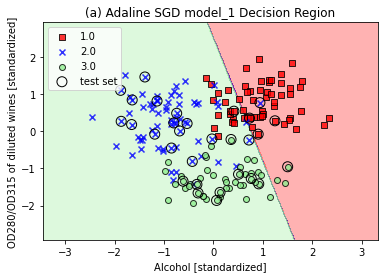

Data that is not predicted correctly in model_1 : 2
Accuracy for model_1 : 98.67 %



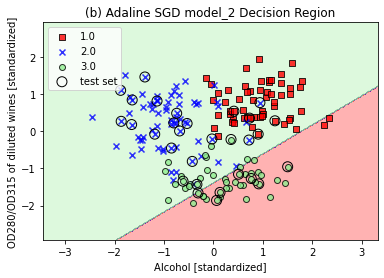

Data that is not predicted correctly in model_2 : 7 

Accuracy for model_2 : 95.33 %



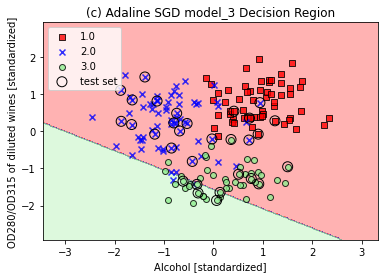

Data that is not predicted correctly in model_3 : 3 

Accuracy for model_3 : 98.00 %



In [109]:
a = X_train_std[:,[1,12]]
b = X_test_std[:,[1,12]]

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=adals_1, test_idx=range(120,150))
plt.title('(a) Adaline SGD model_1 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_1 = adals_1.predict(np.vstack((X_train_std, X_test_std)))
error_1 = np.sum(yp_1 != (np.hstack((y_train_1, y_test_1))))
print("Data that is not predicted correctly in model_1 :", error_1)
print("Accuracy for model_1 : %.2f %%\n" % float((150-error_1)/150*100))
                 
plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=adals_2, test_idx=range(120,150))
plt.title('(b) Adaline SGD model_2 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_2 = adals_2.predict(np.vstack((X_train_std, X_test_std)))
error_2 = np.sum(yp_2 != (np.hstack((y_train_2, y_test_2))))
print("Data that is not predicted correctly in model_2 :", error_2, "\n")
print("Accuracy for model_2 : %.2f %%\n" % float((150-error_2)/150*100))

plot_decision_regions(np.vstack((a, b)), np.hstack((y_train, y_test)), 
                      classifier=adals_3, test_idx=range(120,150))
plt.title('(c) Adaline SGD model_3 Decision Region')
plt.xlabel('Alcohol [standardized]')
plt.ylabel('OD280/OD315 of diluted wines [standardized]')
plt.legend(loc='upper left')
plt.show()

yp_3 = adals_3.predict(np.vstack((X_train_std, X_test_std)))
error_3 = np.sum(yp_3 != (np.hstack((y_train_3, y_test_3))))
print("Data that is not predicted correctly in model_3 :", error_3, "\n")
print("Accuracy for model_3 : %.2f %%\n" % float((150-error_3)/150*100))

### Question2 Conclusion
在question2中，我採用了全部13個features去train，並且有事先將data都標準化，這樣子調整eta及n_iter就好調很多了，因為有先標準化，所以比較不會有稍微微調，prediction就巨幅變化的情形。並且accuracy也高了許多，不論是使用哪種algorithm或其中的哪個model，accuracy都可以達到將近100%。